<h4>Classification - Gradient Descent Overview</h4>
<ul>
<li>Predict a binary class as output based on given features.
</li>

<li>Examples: Do we need to follow up on a customer review? Is this transaction fraudulent or valid one? Are there signs of onset of a medical condition or disease? Is this considered junk food or not?</li>

<li>Linear Model. Estimated Target = w<sub>0</sub> + w<sub>1</sub>x<sub>1</sub> 
+ w<sub>2</sub>x<sub>2</sub> + w<sub>3</sub>x<sub>3</sub> 
+ … + w<sub>n</sub>x<sub>n</sub><br>
where, w is the weight and x is the feature
</li>

<li><b>Logistic Regression</b>. Estimated Probability = <b>sigmoid</b>(w<sub>0</sub> + w<sub>1</sub>x<sub>1</sub> 
+ w<sub>2</sub>x<sub>2</sub> + w<sub>3</sub>x<sub>3</sub> 
+ … + w<sub>n</sub>x<sub>n</sub>)<br>
where, w is the weight and x is the feature
</li>
<li>Linear model output is fed thru a sigmoid/logistic function to produce the probability.</li>
<li>Predicted Value: Probability of a binary outcome.  Closer to 1 is positive class, closer to 0 is negative class</li>
<li>Algorithm Used: Logistic Regression. Objective is to find the weights w that maximizes separation between the two classes</li>
<li>Optimization: Gradient Descent. Seeks to minimize loss/cost so that predicted value is as close to actual as possible</li>
<li>Cost/Loss Calculation: Logistic loss function</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Sigmoid or logistic function
# For any x, output is bounded between 0 & 1

# Binary classifier uses this function to convert the output produced by a linear model
#   into a probability between 0 & 1

def sigmoid_func(x):
    return 1.0/(1 + np.exp(-x))

In [3]:
print('Sigmoid({0})\t={1:10.5f}'.format(10, sigmoid_func(10)))
print('Sigmoid({0})\t={1:10.5f}'.format(0, sigmoid_func(0)))
print('Sigmoid({0})\t={1:10.5f}'.format(-10, sigmoid_func(-10)))

Sigmoid(10)	=   0.99995
Sigmoid(0)	=   0.50000
Sigmoid(-10)	=   0.00005


In [4]:
# Sigmoid function example
x = pd.Series(np.arange(-8,8,0.5))
y = x.map(sigmoid_func)

In [5]:
print (x.head())
print(x.tail())

0   -8.0
1   -7.5
2   -7.0
3   -6.5
4   -6.0
dtype: float64
27    5.5
28    6.0
29    6.5
30    7.0
31    7.5
dtype: float64


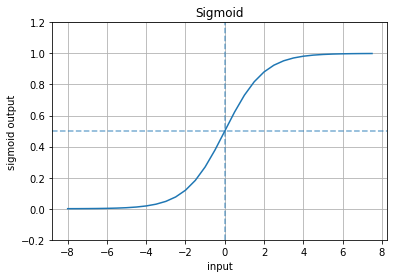

In [6]:
plt.plot(x,y)
plt.ylim((-0.2,1.2))
plt.xlabel('input')
plt.ylabel('sigmoid output')
plt.grid(True)

plt.axvline(x=0,ymin=0,ymax=1, ls='dashed',alpha=0.6)
plt.axhline(y=0.5,xmin=0,xmax=10, ls='dashed',alpha=0.6)
plt.title('Sigmoid')
plt.show()

Example Dataset - Hours spent and Exam Results: 
https://en.wikipedia.org/wiki/Logistic_regression

Sigmoid function produces an output between 0 and 1 no.  Input closer to 0 produces and output of 0.5 probability.  Negative input produces value less than 0.5 while positive input produces value greater than 0.5

In [7]:
data_path = 'HoursExamResult.csv'

In [8]:
df = pd.read_csv(data_path)

Input Feature: Hours<br>
Output: Pass (1 = pass, 0 = fail)

In [9]:
df.head()

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


In [10]:
# Logistic Regression
import numpy as np
from sklearn.linear_model import LogisticRegression

In [11]:
classifier = LogisticRegression(solver='liblinear')

In [12]:
classifier.fit(df[['Hours']],df['Pass'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
classifier.coef_, classifier.intercept_

(array([[0.61126347]]), array([-1.36550178]))

In [14]:
# weights given in the wiki web page - other option is compute weight using logistic regression
# True Function
def linear_model(x):
    return 1.5046*x - 4.0777

In [15]:
# Estimate predicted value for a given weight
def predicted_at_weight(weight0, weight1, x):
    return weight1*x + weight0

In [16]:
# Generate probability by running feature thru the linear model and then thru sigmoid function
y_predicted = sigmoid_func(linear_model(df.Hours))

In [17]:
# Output produced by linear classifier
linear_model(df.Hours)

0    -3.32540
1    -2.94925
2    -2.57310
3    -2.19695
4    -1.82080
5    -1.44465
6    -1.44465
7    -1.06850
8    -0.69235
9    -0.31620
10    0.05995
11    0.43610
12    0.81225
13    1.18840
14    1.94070
15    2.31685
16    2.69300
17    3.06915
18    3.44530
19    4.19760
Name: Hours, dtype: float64

In [18]:
# Convert the Output to a probability
sigmoid_func(linear_model(df.Hours))

0     0.034710
1     0.049772
2     0.070890
3     0.100025
4     0.139338
5     0.190826
6     0.190826
7     0.255688
8     0.333511
9     0.421602
10    0.514983
11    0.607329
12    0.692589
13    0.766455
14    0.874429
15    0.910263
16    0.936612
17    0.955602
18    0.969091
19    0.985191
Name: Hours, dtype: float64

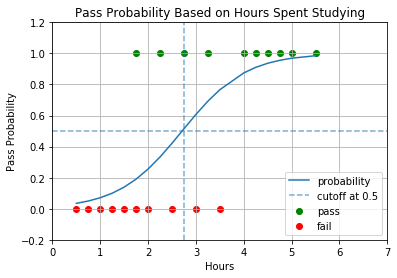

In [19]:
plt.plot(df.Hours,y_predicted,label='probability')
plt.scatter(x=df[df.Pass==1].Hours,y=df[df.Pass==1].Pass, color='g', label='pass')
plt.scatter(x=df[df.Pass==0].Hours,y=df[df.Pass==0].Pass, color='r',label='fail')

plt.title('Pass Probability Based on Hours Spent Studying')
plt.xlabel('Hours')
plt.ylabel('Pass Probability')

plt.axvline(x=2.75,ymin=0,ymax=1,ls='dashed',alpha=0.6)
plt.axhline(y=0.5,xmin=0,xmax=6, label='cutoff at 0.5',ls='dashed',alpha=0.6)

plt.grid(True)
plt.xlim((0,7))
plt.ylim((-0.2,1.2))
plt.legend()
plt.show()

At 2.7 hours of study time, we hit 0.5 probability.  So, any student who spent 2.7 hours or more would have a higher probability of passing the exam.

In the above example,<br>
1. Top right quadrant = true positive. pass got classified correctly as pass
2. Bottom left quadrant = true negative. fail got classified correctly as fail
3. Top left quadrant = false negative. pass got classified as fail
4. Bottom right quadrant = false positive. fail got classified as pass

Cutoff can be adjusted; instead of 0.5, cutoff could be established at 0.4 or 0.6 depending on the nature of problem

In [20]:
# True Function => 1.5046*x - 4.0777 
# Keep w0 constant and vary weight for hours
w0 = [-4,-4,-4]
w1 = [0.5,1,2]
y_predicted_wt = {}

for i in range(len(w1)):
    y_predicted_wt['{0},{1}'.format(w0[i],w1[i])] \
        = sigmoid_func(predicted_at_weight(w0[i],w1[i],df.Hours))

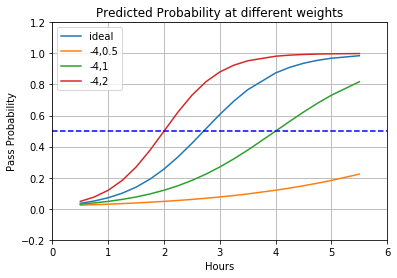

In [21]:
plt.plot(df.Hours, y_predicted, label='ideal')

for w in y_predicted_wt.keys():
    plt.plot(df.Hours,y_predicted_wt[w],label=w)
    
plt.xlim((0,6))
plt.ylim((-0.2,1.2))
plt.axhline(y=0.5,xmin=0,xmax=6, color = 'b', ls='dashed')
plt.xlabel('Hours')
plt.ylabel('Pass Probability')
plt.title('Predicted Probability at different weights')
plt.legend()
plt.grid(True)
plt.show()

ideal curve = gives a pass probability of 0.5 at around 2.75 hours of study  
w(-4,0.5) curve = fails everyone.  it gives a probability of 0.2 for 5.5 hours of study  
w(-4,1) curve = gives a pass probability of 0.5 at around 4 hours of study  
w(-4,2) curve = give a pass probability of 0.5 at around 2 hours of study  
Each of these curves have a different loss  

<h4>Logistic Loss</h4>

In [22]:
# Logistic Loss

#   Positive Class Loss = -log(predicted_y)     ### For positive samples
#   Negative Class Loss = -log(1-predicted_y)   ### For negative samples

#   Logistic Loss = Positive Class Loss + Negative Class Loss

def compute_logisitic_cost(y_actual, y_predicted):    
    # For loss computation, we need to separate postive and negative classes
    #  loss calculation is slightly different for positive and negative class
    
    positive_class = y_predicted[y_actual==1]
    negative_class = y_predicted[y_actual == 0]
    
    positive_cost = -np.log(positive_class).sum()
    negative_cost = -np.log(1 - negative_class).sum()
    
    return positive_cost + negative_cost

In [23]:
# Example 1 - Predicted value is exact opposite of actual
# Loss should be very high
actual = pd.Series([1,
                    0,
                    1,
                    0])

predicted = pd.Series([0.1,
                       0.9,
                       0.2,
                       0.8])
print('Loss: {0:0.3f}'.format(compute_logisitic_cost(actual, predicted)))

Loss: 7.824


In [24]:
# Example 2 - Predicted value is close to actual
# Loss should be very low
actual = pd.Series([1,
                    0,
                    1,
                    0])

predicted = pd.Series([0.8,
                       0.1,
                       0.95,
                       0.2])

print('Loss: {0:0.3f}'.format(compute_logisitic_cost(actual, predicted)))

Loss: 0.603


In [25]:
# Example 3 - Predicted value is mid-point

actual = pd.Series([1,
                    0,
                    1,
                    0])

predicted = pd.Series([0.58,
                       0.4,
                       0.55,
                       0.45])

print('Loss: {0:0.3f}'.format(compute_logisitic_cost(actual, predicted)))

Loss: 2.251


In [26]:
# Compute loss at different weights
for w in y_predicted_wt.keys():
    logistic_loss = compute_logisitic_cost(df.Pass, y_predicted_wt[w])    
    print('Weight:{0}\tLoss: {1:5.2f}'.format(w, logistic_loss))

Weight:-4,0.5	Loss: 22.80
Weight:-4,1	Loss: 11.02
Weight:-4,2	Loss: 10.20


<h4>Plot Loss at different weights for x</h4>

In [27]:
# Cost Function
z = pd.Series(np.linspace(0.0001,0.999999,100))
ypositive = -np.log(z)
ynegative = -np.log(1-z)

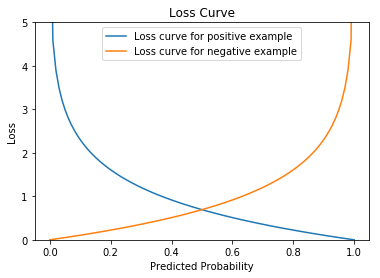

In [28]:
plt.plot(z,ypositive, label='Loss curve for positive example')
plt.plot(z,ynegative, label='Loss curve for negative example')
plt.ylabel('Loss')
plt.xlabel('Predicted Probability')
plt.ylim((0,5))
plt.title('Loss Curve')
plt.legend()
plt.show()

Cost function is a log curve<br>
1. positive example correctly classified as positive has a lower loss
2. positive example incorrectly classified as negative has a higher loss
3. Negative example correctly classified as negative has a lower loss
4. Negative example incorrectly classifed as positive has a higher loss 

In [29]:
# Test with different weight for hours
weight = pd.Series(np.linspace(-1.5,5,num=100))
loss_at_wt = []
for w1 in weight:
    y_predicted_wt = sigmoid_func(predicted_at_weight(-4.0777, w1,  df.Hours))
    
    # Compute loss
    loss_at_wt.append(compute_logisitic_cost(df.Pass, pd.Series(y_predicted_wt)))

In [30]:
min(loss_at_wt),max(loss_at_wt)

(8.032272265372923, 97.8036875356258)

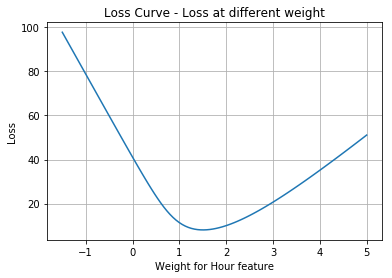

In [31]:
plt.plot(weight, loss_at_wt)
plt.xlabel('Weight for Hour feature')
plt.ylabel('Loss')
plt.grid(True)
plt.title('Loss Curve - Loss at different weight')
plt.show()

<h4>Summary</h4>
<p><b>Binary Classifier</b> Predicts positive class probability of an observation </p>
<p><b>Logistic or Sigmod function</b> has an important property where output is between 0 and 1 for any input.  This output is used by binary classifiers as a probability of positive class</p>

<p><b>Logistic Loss Function</b> is parabolic in nature. It has an important property of not only telling us the loss at a given weight, but also tells us which way to go to minimize loss</p>

<h4>Gradient Descent</h4>
Gradient Descent optimization computes the loss and slope, then adjusts the weights of all the features.<br>
It iterates this process until it finds the optimal weight.<br>
There are three flavors of Gradient descent:<br>

<h4>Batch Gradient Descent</h4>
Batch gradient descent computes loss for all examples in the training set and then adjusts the weight<br>
It repeats this process for every iteration.<br>
This process can be slow to converge when you have a large training data set<br>


<h4>Stochastic Gradient Descent</h4>
With Stochastic Gradient Descent, the algorithm computes loss for the next training example and immediately adjusts the weights.  This approach can help in converging to optimal weights for large data sets.<br>
However, one problem with this approach is algorithm is adjusting weights based on a single example [our end objective is to find weight that works for all training examples and not for the immediate example], and this can result in wild fluctuation in weights.<br>


<h4>Mini-Batch Gradient Descent</h4>
Mini-batch Gradient descent combines benefit of Stochastic and Batch Gradient descent.<br>
It adjusts the weight by testing few samples. The number of samples is defined by mini-batch size, typically around 128.<br>
The mini-batch approach can be used to compute loss in parallel.<br>
This technique is prevalent in deep learning and other algorithms.<br>

